### DS102 | In Class Practice Week 5B - Clustering Algorithms
<hr>

## Learning Objectives
At the end of the lesson, you will be able to:

- apply $k$-means algorithm to form clusters

**Datasets required:**

- `spotify-30.csv` from [Kaggle/Spotify](https://www.kaggle.com/nadintamer/top-tracks-of-2017)

Import the libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

### Read from CSV File & Exploratory Data Analysis
Read `spotify-30.csv` into `df`.

In [3]:
df = pd.read_csv('spotify-30.csv')
display(df.head())
print(df.info())
display(df.describe(include='all'))

,id,name,artists,danceability,energy
0,6gBFPUFcJLzWGx4lenP6h,goosebumps,Travis Scott,0.841,0.728
1,6PCUP3dWmTjcTtXY02oFd,Castle on the Hill,Ed Sheeran,0.461,0.834
2,3eR23VReFzcdmS7TYCrhC,It Ain't Me (with Selena Gomez),Kygo,0.640,0.533
3,0tKcYR2II1VCQWT79i5Nr,Thunder,Imagine Dragons,0.600,0.810
4,6DNtNfH8hXkqOX1sjqmI7,Cold Water (feat. Justin Bieber & MØ),Major Lazer,0.608,0.798


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
id              30 non-null object
name            30 non-null object
artists         30 non-null object
danceability    30 non-null float64
energy          30 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.2+ KB
None


,id,name,artists,danceability,energy
count,30,30,30,30.000000,30.00000
unique,30,30,25,NaN,NaN
top,4pdPtRcBmOSQDlJ3Fk945,Passionfruit,Ed Sheeran,NaN,NaN
freq,1,1,3,NaN,NaN
mean,NaN,NaN,NaN,0.692400,0.65710
std,NaN,NaN,NaN,0.172497,0.13114
min,NaN,NaN,NaN,0.258000,0.43700
25%,NaN,NaN,NaN,0.599250,0.54425
50%,NaN,NaN,NaN,0.638500,0.65850
75%,NaN,NaN,NaN,0.838750,0.79150


**Revision Exercise**: Plot a scatter plot where the $x$-axis is `danceability` and the $y$-axis is `energy`.

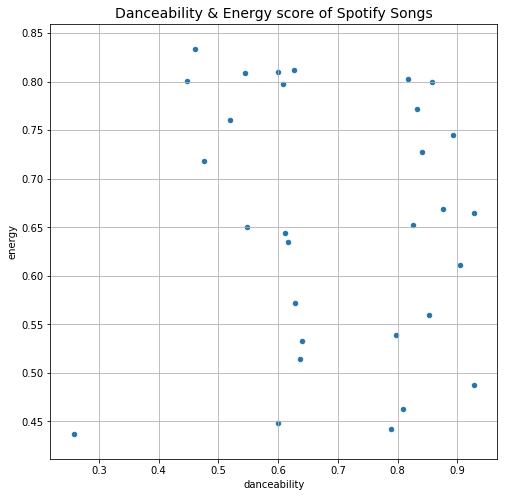

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# Exercise: Plot the scatterplot for danceability and energy
df.plot(kind = 'scatter', x = 'danceability', y = 'energy', ax=ax)

# Additional parameters are given to you.
ax.set_title("Danceability & Energy score of Spotify Songs", fontsize=14)
ax.grid(which='both')
plt.show()

<hr>
It seems that there are 2 distinct clusters, one on the left and one on the right.  We are now ready to perform the training of the model.

### $k$-means Clustering: Problem Statement

Given the `danceability` and `energy` of songs from the top 100 list of Spotify songs, attempt to cluster them into 2 groups.

### Create $\textbf{X}$

Declare `X` to represent $\textbf{X}$ the input variables. This is an unsupervised training algorithm. Hence there is no target variable $\textbf{y}$.

In [6]:
input_cols = ['danceability','energy']
# Declare X. Use input_cols to help you.
X = df[input_cols]
X.head(3)

,danceability,energy
0,0.841,0.728
1,0.461,0.834
2,0.640,0.533


### TRAIN
Use `model = KMeans(n_clusters=2, random_state=0)` to instantiate the model. Since 2 clusters are needed, set `n_clusters=2`. Next, use `model.fit(X)` to perform the clustering. 

In [7]:
# Create the model
model = KMeans(n_clusters=2, random_state = 0)

# Use the fit() function to get the assigninment using the 2 clusters
results=model.fit(X)

# print() the result in kmeans
print(results)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)


Use `kmeans.labels_` to get the cluster label for every classified song in the training set.

In [8]:
# print() kmeans.labels_ to see the clustering output for every observation
results.labels_

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0])

The above is the results of the clustering. Now, attach these cluster labels back to a copy of the `df`. Create a copy of the `df` called `X_results`. In `X_results`, create a new column called `label` and store the resultant label in this column.

In [10]:
# Create a df with one column 'label', and its values are kmeans.labels_
df_labels = pd.DataFrame({'predicted_label' : results.labels_})
display(df_labels.head(3))
display(df.head(3))

,predicted_label
0,0
1,1
2,1


,id,name,artists,danceability,energy
0,6gBFPUFcJLzWGx4lenP6h,goosebumps,Travis Scott,0.841,0.728
1,6PCUP3dWmTjcTtXY02oFd,Castle on the Hill,Ed Sheeran,0.461,0.834
2,3eR23VReFzcdmS7TYCrhC,It Ain't Me (with Selena Gomez),Kygo,0.640,0.533


We can merge the results in `X_results` with the original `df` to check the respective label of each song.

In [12]:
df['predicted_label'] = results.labels_


**Exercise**: Filter for all songs with label $0$. Do the same for label $1$.

In [17]:
# Exercise: Display all songs in class 0
display(df[df['predicted_label'] == 0].head())

,id,name,artists,danceability,energy,predicted_label
0,6gBFPUFcJLzWGx4lenP6h,goosebumps,Travis Scott,0.841,0.728,0
5,1a5Yu5L18qNxVhXx38njO,Hear Me Now,Alok,0.789,0.442,0
7,79cuOz3SPQTuFrp8WgftA,There's Nothing Holdin' Me Back,Shawn Mendes,0.857,0.800,0
11,0KKkJNfGyhkQ5aFogxQAP,That's What I Like,Bruno Mars,0.853,0.560,0
12,3QwBODjSEzelZyVjxPOHd,Otra Vez (feat. J Balvin),Zion & Lennox,0.832,0.772,0


In [18]:
# Exercise: Display all songs in class 1
display(df[df['predicted_label'] == 1].head())

,id,name,artists,danceability,energy,predicted_label
1,6PCUP3dWmTjcTtXY02oFd,Castle on the Hill,Ed Sheeran,0.461,0.834,1
2,3eR23VReFzcdmS7TYCrhC,It Ain't Me (with Selena Gomez),Kygo,0.640,0.533,1
3,0tKcYR2II1VCQWT79i5Nr,Thunder,Imagine Dragons,0.600,0.810,1
4,6DNtNfH8hXkqOX1sjqmI7,Cold Water (feat. Justin Bieber & MØ),Major Lazer,0.608,0.798,1
6,5tz69p7tJuGPeMGwNTxYu,1-800-273-8255,Logic,0.629,0.572,1


### PREDICT
Finally, given a new song from the Spotify 100 list, predict the class of this song.

In [21]:
X_P = pd.DataFrame([{'name' : 'Your Song',
                    'danceability' : 0.855,
                    'energy' : 0.624}])
display(X_P)
# Predict result of a song using kmeans.predict()
results.predict(X_P[['danceability','energy']])

,danceability,energy,name
0,0.855,0.624,Your Song


array([0])

<hr>
<center>$\diamond$</center>

### Further Exploration - Finding the centroids & plotting the scatterplot

The centroids of the model can be found using `kmeans.cluster_centers_`.

In [23]:
# print() the cluster centers
#
print(results.cluster_centers_)
centroid_df_cols = ["danceability", "energy"]
centroids_df = pd.DataFrame(results.cluster_centers_, 
                            columns=centroid_df_cols)
centroids_df['label'] = centroids_df.index
display(centroids_df)

[[0.8535     0.63835714]
 [0.5514375  0.6735    ]]


,danceability,energy,label
0,0.853500,0.638357,0
1,0.551438,0.673500,1


Plot the training set with their associated labels, and with the centroids.

NameError: name 'new_df' is not defined

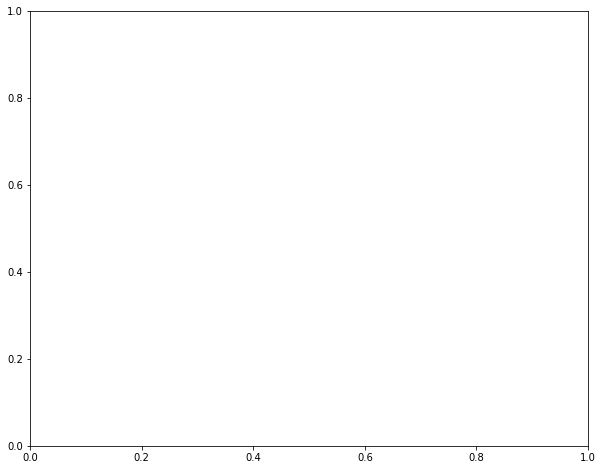

In [24]:
# Plot the results in a scatter plot, and add in the centroids
#
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111)

# Write the scatter plot here for the labels, Use s=120, where
# s represents the size of the marker.
#
new_df.plot(kind='scatter', x='danceability', 
               y='energy', c='label', colormap='autumn', ax=ax1
              ,marker="o", s=120)

# Write the scatter plot here for the centroids Use s=120, where
# s represents the size of the marker.
#
centroids_df.plot(kind='scatter', x='danceability', 
               y='energy', color='gray', ax=ax1,
                marker="X", s=120,)

# The following is given to you.
ax1.set_title("Spotify songs by danceability & energy, after k-means clustering")
plt.xticks(rotation=90)
plt.show()

### Further Exploration - Side-by-Side Before & After Plot

Now that we have the above plot, let's plot this result and the initial plot (before clustering) side by side.

In [ ]:
# Plot the initial plot and plot after k-means side-by-side
fig = plt.figure(figsize=(14, 12))
ax1 = fig.add_subplot(221)

# Plot the initial plot here.
df.plot(kind='scatter', x='danceability', y='energy', ax=ax1)
ax1.set_title("Danceability & Energy score of Spotify Songs")

ax2 = fig.add_subplot(222)
# Plot the plot with the clustered data here.
new_df.plot(kind='scatter', x='danceability', 
               y='energy', c='label', colormap='autumn', ax=ax2
              ,marker="o", s=80)
centroids_df.plot(kind='scatter', x='danceability', 
               y='energy', color='gray', ax=ax2,
                marker="X", s=80,)
ax2.set_title("After k-means clustering")

plt.xticks(rotation=90)
plt.show()

### Further Exploration - Predict for another song

In [ ]:
# Exercise: Pick another song from the Spotify 100 charts. 
# What is the predicted class of your selected song?
#

**Credits:**
- https://www.kaggle.com/nadintamer/top-tracks-of-2017